In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
import re
import math

In [3]:
train_file = "C:\\Users\\AdityaS\\Desktop\\data_mining_competition\\train_data.csv"
test_file = "C:\\Users\\AdityaS\\Desktop\\data_mining_competition\\test.csv"

In [4]:
def straight_dist(x_start, x_end, y_start, y_end):
    return np.sqrt((x_end - x_start)**2 + (y_end - y_start)**2)

def calc_azt(x_start, x_end, y_start, y_end ):
    return math.degrees(math.atan2(y_end - y_start, x_end - x_start)) // 45

def coordinates_bin(coor):
    return coor // 50 + 21

def convert_ts_to_datetime(ts):
    return datetime.datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')

def get_weekday(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.weekday()

def is_weekend(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.weekday() >= 5

def get_day(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.day

def get_month(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.month

def get_year(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.year

def get_hour(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.hour

def get_minute(ts):
    dt = convert_ts_to_datetime(ts)
    return dt.minute // 10

def time_classification(ts):
    hour = get_hour(ts)
    if hour <= 5:
        return "Midnight"
    if hour <= 8:
        return "Morning"
    if hour <= 11:
        return "Noon"
    if hour <= 18:
        return "Afternoon"
    if hour <= 20:
        return "Night"
    else:
        return "LateNight"

def taxi_id_bucket(taxi_id):
    return taxi_id // 10

In [5]:
vec_straight_dist = np.vectorize(straight_dist)
vec_calc_azt = np.vectorize(calc_azt)
vec_coordinates_bin = np.vectorize(coordinates_bin)
vec_get_weekday = np.vectorize(get_weekday)
vec_is_weekend = np.vectorize(is_weekend)
vec_get_day = np.vectorize(get_day)
vec_get_month = np.vectorize(get_month)
vec_get_year = np.vectorize(get_year)
vec_get_hour = np.vectorize(get_hour)
vec_get_minute = np.vectorize(get_minute)
vec_time_classification = np.vectorize(time_classification)
vec_taxi_id_bucket = np.vectorize(taxi_id_bucket)

In [6]:
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

In [7]:
def preprocessing_train(df_train):
    df_train = df_train.drop(['X_TRAJECTORY','Y_TRAJECTORY'], axis = 1)
    df_train['LOG_DURATION'] = np.log(df_train['DURATION'])
    df_train['LOG_TRAJ_LENGTH'] = np.log(df_train['TRAJ_LENGTH'])
    df_train['LOG_STRAIGHT_DIST'] = np.log(vec_straight_dist(df_train['X_START'], df_train['X_END'], df_train['Y_START'], df_train['Y_END']))
    df_train['AZT'] = vec_calc_azt(df_train['X_START'], df_train['X_END'], df_train['Y_START'], df_train['Y_END'])
    df_train['X_START_BIN'] = vec_coordinates_bin(df_train['X_START'])
    df_train['X_END_BIN'] = vec_coordinates_bin(df_train['X_END'])
    df_train['Y_START_BIN'] = vec_coordinates_bin(df_train['Y_START'])
    df_train['Y_END_BIN'] = vec_coordinates_bin(df_train['Y_END'])
    df_train['WEEKDAY'] = vec_get_weekday(df_train['TIMESTAMP'])
    df_train['ISWEEKEND'] = vec_is_weekend(df_train['TIMESTAMP'])
    df_train['DAY'] = vec_get_day(df_train['TIMESTAMP'])
    df_train['MONTH'] = vec_get_month(df_train['TIMESTAMP'])
    df_train['YEAR'] = vec_get_year(df_train['TIMESTAMP'])
    df_train['HOUR'] = vec_get_hour(df_train['TIMESTAMP'])
    df_train['MINUTE'] = vec_get_minute(df_train['TIMESTAMP'])
    df_train['TIME_CLASS'] = vec_time_classification(df_train['TIMESTAMP'])
    df_train['TAXI_ID_BIN'] = vec_taxi_id_bucket(df_train['TAXI_ID'])
    return df_train

def postprocessing_train(df_train):
    log_duration = df_train['LOG_DURATION'].values
    log_traj_length = df_train['LOG_TRAJ_LENGTH'].values
    return log_duration, log_traj_length, df_train.drop(['ID','TIMESTAMP','DURATION', 'TAXI_ID',
                         'X_START', 'Y_START', 'X_END', 'Y_END',
                         'TRAJ_LENGTH', 'LOG_DURATION', 'LOG_TRAJ_LENGTH'], axis = 1)

def preprocessing_test(df_test):
    df_test['LOG_STRAIGHT_DIST'] = np.log(vec_straight_dist(df_test['X_START'], df_test['X_END'], df_test['Y_START'], df_test['Y_END']))
    df_test['AZT'] = vec_calc_azt(df_test['X_START'], df_test['X_END'], df_test['Y_START'], df_test['Y_END'])
    df_test['X_START_BIN'] = vec_coordinates_bin(df_test['X_START'])
    df_test['X_END_BIN'] = vec_coordinates_bin(df_test['X_END'])
    df_test['Y_START_BIN'] = vec_coordinates_bin(df_test['Y_START'])
    df_test['Y_END_BIN'] = vec_coordinates_bin(df_test['Y_END'])
    df_test['WEEKDAY'] = vec_get_weekday(df_test['TIMESTAMP'])
    df_test['ISWEEKEND'] = vec_is_weekend(df_test['TIMESTAMP'])
    df_test['DAY'] = vec_get_day(df_test['TIMESTAMP'])
    df_test['MONTH'] = vec_get_month(df_test['TIMESTAMP'])
    df_test['YEAR'] = vec_get_year(df_test['TIMESTAMP'])
    df_test['HOUR'] = vec_get_hour(df_test['TIMESTAMP'])
    df_test['MINUTE'] = vec_get_minute(df_test['TIMESTAMP'])
    df_test['TIME_CLASS'] = vec_time_classification(df_test['TIMESTAMP'])
    df_test['TAXI_ID_BIN'] = vec_taxi_id_bucket(df_test['TAXI_ID'])
    return df_test.drop(['ID','TIMESTAMP', 'TAXI_ID',
                         'X_START', 'Y_START', 'X_END', 'Y_END'], axis = 1)

In [8]:
def dummify(df):
    columns = ['AZT', 'X_START_BIN', 'X_END_BIN', 'Y_START_BIN', 'Y_END_BIN', 'WEEKDAY', 'ISWEEKEND', 'DAY', 'MONTH', 'YEAR',
              'HOUR', 'MINUTE', 'TIME_CLASS', 'TAXI_ID_BIN']
    return pd.get_dummies(df, columns=columns, prefix=columns)

In [9]:
processed_train_df = preprocessing_train(df_train)
log_duration, log_traj_length, processed_train_df = postprocessing_train(processed_train_df)
processed_test_df = preprocessing_test(df_test)

In [63]:
processed_test_df

,LOG_STRAIGHT_DIST,AZT,X_START_BIN,X_END_BIN,Y_START_BIN,Y_END_BIN,WEEKDAY,ISWEEKEND,DAY,MONTH,YEAR,HOUR,MINUTE,TIME_CLASS,TAXI_ID_BIN
0,4.180153,3.0,14,13,18,19,5,True,23,8,2008,18,4,Afternoon,25
1,4.152618,-2.0,15,15,18,17,4,False,22,8,2008,14,4,Afternoon,56
2,4.807636,-1.0,13,15,17,15,4,False,25,7,2008,19,1,Night,21
3,5.877771,-3.0,18,17,20,13,0,False,20,4,2009,11,5,Noon,27
4,4.670333,2.0,14,14,14,17,4,False,13,6,2008,8,1,Morning,8
5,5.318240,0.0,14,18,15,16,5,True,14,2,2009,2,1,Midnight,1
6,4.380540,-1.0,14,16,16,15,0,False,2,3,2009,10,0,Noon,4
7,5.840071,0.0,13,18,17,21,1,False,30,12,2008,20,0,Night,20
8,4.711515,0.0,14,16,15,16,5,True,1,11,2008,2,4,Midnight,15
9,4.211331,0.0,15,16,17,17,3,False,24,7,2008,17,4,Afternoon,46


In [62]:
processed_train_df

,LOG_STRAIGHT_DIST,AZT,X_START_BIN,X_END_BIN,Y_START_BIN,Y_END_BIN,WEEKDAY,ISWEEKEND,DAY,MONTH,YEAR,HOUR,MINUTE,TIME_CLASS,TAXI_ID_BIN
0,5.788053,1.0,16,18,14,20,5,True,7,3,2009,7,4,Morning,12
1,5.436394,-3.0,15,14,19,15,4,False,18,7,2008,9,2,Noon,42
2,3.861560,2.0,14,14,15,15,1,False,10,3,2009,10,2,Noon,5
3,3.954194,2.0,13,13,16,17,2,False,3,9,2008,15,2,Afternoon,13
4,4.428615,-2.0,14,14,16,15,0,False,22,9,2008,13,1,Afternoon,54
5,5.321342,-1.0,14,18,15,15,0,False,12,1,2009,15,1,Afternoon,79
6,3.960223,0.0,13,14,15,15,1,False,4,11,2008,16,2,Afternoon,3
7,4.215709,2.0,15,14,15,16,0,False,20,10,2008,17,0,Afternoon,23
8,3.785222,-2.0,14,14,19,18,0,False,16,2,2009,17,1,Afternoon,9
9,4.564836,0.0,14,16,15,15,0,False,23,2,2009,22,3,LateNight,46


In [10]:
print processed_train_df.columns
print processed_test_df.columns
print processed_train_df.shape
print processed_train_df.shape

Index([u'LOG_STRAIGHT_DIST', u'AZT', u'X_START_BIN', u'X_END_BIN',
       u'Y_START_BIN', u'Y_END_BIN', u'WEEKDAY', u'ISWEEKEND', u'DAY',
       u'MONTH', u'YEAR', u'HOUR', u'MINUTE', u'TIME_CLASS', u'TAXI_ID_BIN'],
      dtype='object')
Index([u'LOG_STRAIGHT_DIST', u'AZT', u'X_START_BIN', u'X_END_BIN',
       u'Y_START_BIN', u'Y_END_BIN', u'WEEKDAY', u'ISWEEKEND', u'DAY',
       u'MONTH', u'YEAR', u'HOUR', u'MINUTE', u'TIME_CLASS', u'TAXI_ID_BIN'],
      dtype='object')
(465172, 15)
(465172, 15)


In [11]:
concat_df = pd.concat((processed_train_df, processed_test_df))
concat_df = dummify(concat_df)
concat_df.reindex_axis(sorted(concat_df.columns), axis=1)

C:\Users\AdityaS\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,AZT_-1.0,AZT_-2.0,AZT_-3.0,AZT_-4.0,AZT_0.0,AZT_1.0,AZT_2.0,AZT_3.0,AZT_4.0,DAY_1,...,Y_END_BIN_22,Y_START_BIN_12,Y_START_BIN_13,Y_START_BIN_14,Y_START_BIN_15,Y_START_BIN_16,Y_START_BIN_17,Y_START_BIN_18,Y_START_BIN_19,Y_START_BIN_20
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
column_names = sorted(concat_df.columns)
column_names

['AZT_-1.0',
 'AZT_-2.0',
 'AZT_-3.0',
 'AZT_-4.0',
 'AZT_0.0',
 'AZT_1.0',
 'AZT_2.0',
 'AZT_3.0',
 'AZT_4.0',
 'DAY_1',
 'DAY_10',
 'DAY_11',
 'DAY_12',
 'DAY_13',
 'DAY_14',
 'DAY_15',
 'DAY_16',
 'DAY_17',
 'DAY_18',
 'DAY_19',
 'DAY_2',
 'DAY_20',
 'DAY_21',
 'DAY_22',
 'DAY_23',
 'DAY_24',
 'DAY_25',
 'DAY_26',
 'DAY_27',
 'DAY_28',
 'DAY_29',
 'DAY_3',
 'DAY_30',
 'DAY_31',
 'DAY_4',
 'DAY_5',
 'DAY_6',
 'DAY_7',
 'DAY_8',
 'DAY_9',
 'HOUR_0',
 'HOUR_1',
 'HOUR_10',
 'HOUR_11',
 'HOUR_12',
 'HOUR_13',
 'HOUR_14',
 'HOUR_15',
 'HOUR_16',
 'HOUR_17',
 'HOUR_18',
 'HOUR_19',
 'HOUR_2',
 'HOUR_20',
 'HOUR_21',
 'HOUR_22',
 'HOUR_23',
 'HOUR_3',
 'HOUR_4',
 'HOUR_5',
 'HOUR_6',
 'HOUR_7',
 'HOUR_8',
 'HOUR_9',
 'ISWEEKEND_False',
 'ISWEEKEND_True',
 'LOG_STRAIGHT_DIST',
 'MINUTE_0',
 'MINUTE_1',
 'MINUTE_2',
 'MINUTE_3',
 'MINUTE_4',
 'MINUTE_5',
 'MONTH_1',
 'MONTH_10',
 'MONTH_11',
 'MONTH_12',
 'MONTH_2',
 'MONTH_3',
 'MONTH_4',
 'MONTH_5',
 'MONTH_6',
 'MONTH_7',
 'MONTH_8',
 'MO

In [13]:
dum_train_df = concat_df.iloc[:processed_train_df.shape[0]]
dum_test_df = concat_df.iloc[processed_train_df.shape[0]:]

In [14]:
print dum_train_df.shape
print dum_test_df.shape
print log_duration.shape
print log_traj_length.shape

(465172, 227)
(465172, 227)
(465172L,)
(465172L,)


In [15]:
all_X_train  = dum_train_df.copy()
all_y_duration_train =  log_duration.copy()
all_y_traj_train = log_traj_length.copy()
all_X_test = dum_test_df.copy()

In [17]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
linear_duration = LinearRegression()
linear_traj_length = LinearRegression()
linear_duration.fit(dum_train_df[['LOG_STRAIGHT_DIST']], all_y_duration_train)
linear_traj_length.fit(dum_train_df[['LOG_STRAIGHT_DIST']], all_y_traj_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
elastic_duration = ElasticNetCV()
elastic_traj_length = ElasticNetCV()
elastic_duration.fit(all_X_train, all_y_duration_train)
elastic_traj_length.fit(all_X_train, all_y_traj_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [46]:
lasso_duration = LassoCV()
lasso_traj_length = LassoCV()
lasso_duration.fit(all_X_train, all_y_duration_train)
lasso_traj_length.fit(all_X_train, all_y_traj_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [54]:
linear_duration_pred = np.exp(linear_duration.predict(dum_test_df[['LOG_STRAIGHT_DIST']]))
linear_traj_length_pred = np.exp(linear_traj_length.predict(dum_test_df[['LOG_STRAIGHT_DIST']]))

In [55]:
elastic_duration_pred = np.exp(elastic_duration.predict(all_X_test))
elastic_traj_length_pred = np.exp(elastic_traj_length.predict(all_X_test))

In [56]:
lasso_duration_pred = np.exp(lasso_duration.predict(all_X_test))
lasso_traj_length_pred = np.exp(lasso_traj_length.predict(all_X_test))

In [57]:
exp_duration_pred = 0.2 * linear_duration_pred + 0.3 * elastic_duration_pred + 0.5 * lasso_duration_pred
exp_traj_length_pred = 0.2 * linear_traj_length_pred + 0.3 * elastic_traj_length_pred + 0.5 * lasso_traj_length_pred
price = exp_duration_pred + exp_traj_length_pred

In [58]:
data = {'ID': df_test["ID"].values,
       'PRICE': price}

In [59]:
submission_df = pd.DataFrame(data = data)

In [60]:
submission_df

,ID,PRICE
0,465173,407.447598
1,465174,335.895778
2,465175,430.704619
3,465176,792.816707
4,465177,433.757353
5,465178,501.277412
6,465179,358.043613
7,465180,743.686434
8,465181,360.481854
9,465182,333.459791


In [61]:
submission_df.to_csv("C:\\Users\\AdityaS\\Desktop\\data_mining_competition\\result_mini_ensemble.csv", index=False)

Lasso picked 154 variables and eliminated the other 73 variables
['AZT_-3.0', 'AZT_4.0', 'X_START_BIN_17', 'X_START_BIN_19', 'X_END_BIN_22', 'X_END_BIN_26', 'X_END_BIN_27', 'X_END_BIN_29', 'Y_START_BIN_16', 'Y_START_BIN_20', 'Y_END_BIN_21', 'WEEKDAY_1', 'WEEKDAY_3', 'WEEKDAY_5', 'DAY_1', 'DAY_3', 'DAY_4', 'DAY_10', 'DAY_11', 'DAY_12', 'DAY_13', 'DAY_17', 'DAY_19', 'DAY_20', 'DAY_21', 'DAY_24', 'DAY_26', 'DAY_27', 'DAY_28', 'DAY_29', 'DAY_31', 'HOUR_1', 'HOUR_2', 'HOUR_3', 'HOUR_7', 'HOUR_9', 'HOUR_11', 'HOUR_21', 'TIME_CLASS_Morning', 'TIME_CLASS_Night', 'TAXI_ID_BIN_0', 'TAXI_ID_BIN_2', 'TAXI_ID_BIN_4', 'TAXI_ID_BIN_5', 'TAXI_ID_BIN_6', 'TAXI_ID_BIN_11', 'TAXI_ID_BIN_12', 'TAXI_ID_BIN_16', 'TAXI_ID_BIN_26', 'TAXI_ID_BIN_35', 'TAXI_ID_BIN_36', 'TAXI_ID_BIN_43', 'TAXI_ID_BIN_44', 'TAXI_ID_BIN_45', 'TAXI_ID_BIN_49', 'TAXI_ID_BIN_50', 'TAXI_ID_BIN_51', 'TAXI_ID_BIN_54', 'TAXI_ID_BIN_55', 'TAXI_ID_BIN_56', 'TAXI_ID_BIN_57', 'TAXI_ID_BIN_58', 'TAXI_ID_BIN_60', 'TAXI_ID_BIN_64', 'TAXI_ID_BIN

Text(0.5,1,u'Coefficients in the Lasso Duration Model')

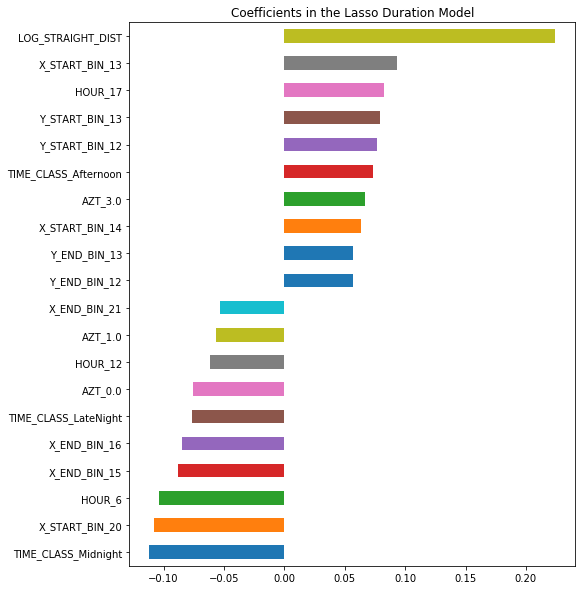

In [84]:
coef = pd.Series(lasso_duration.coef_, index = dum_train_df.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print coef[np.where(coef == 0)[0]].index.tolist()
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Duration Model")

Lasso picked 74 variables and eliminated the other 153 variables
['AZT_-1.0', 'AZT_4.0', 'X_START_BIN_20', 'X_END_BIN_12', 'X_END_BIN_20', 'X_END_BIN_25', 'X_END_BIN_26', 'X_END_BIN_27', 'X_END_BIN_28', 'X_END_BIN_29', 'Y_START_BIN_12', 'Y_START_BIN_18', 'Y_END_BIN_12', 'Y_END_BIN_18', 'WEEKDAY_0', 'WEEKDAY_1', 'WEEKDAY_2', 'WEEKDAY_3', 'WEEKDAY_5', 'DAY_1', 'DAY_2', 'DAY_3', 'DAY_4', 'DAY_5', 'DAY_6', 'DAY_7', 'DAY_8', 'DAY_9', 'DAY_10', 'DAY_11', 'DAY_12', 'DAY_13', 'DAY_14', 'DAY_15', 'DAY_16', 'DAY_17', 'DAY_18', 'DAY_19', 'DAY_20', 'DAY_21', 'DAY_22', 'DAY_23', 'DAY_24', 'DAY_25', 'DAY_26', 'DAY_27', 'DAY_28', 'DAY_29', 'DAY_30', 'DAY_31', 'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7', 'MONTH_8', 'YEAR_2008', 'YEAR_2009', 'HOUR_1', 'HOUR_2', 'HOUR_5', 'HOUR_7', 'HOUR_9', 'HOUR_10', 'HOUR_11', 'HOUR_13', 'HOUR_14', 'HOUR_15', 'HOUR_16', 'HOUR_19', 'HOUR_21', 'HOUR_22', 'HOUR_23', 'MINUTE_0', 'MINUTE_1', 'MINUTE_4', 'TIME_CLASS_Morning', 'TIME_CLASS_Night', 'TAXI_

Text(0.5,1,u'Coefficients in the Lasso Duration Model')

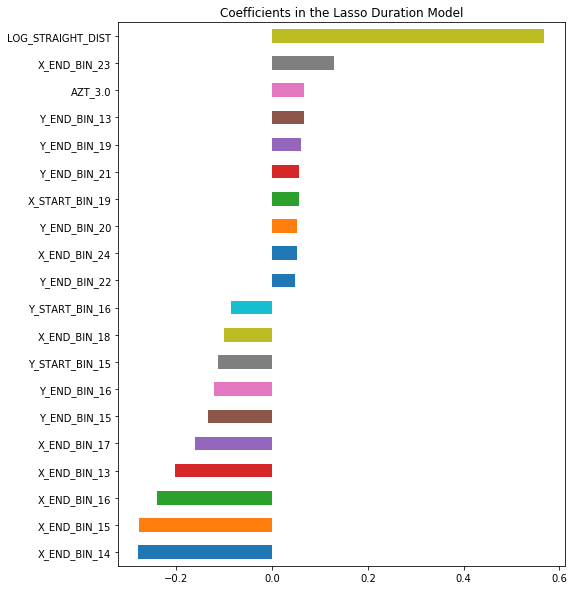

In [83]:
coef = pd.Series(lasso_traj_length.coef_, index = dum_train_df.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print coef[np.where(coef == 0)[0]].index.tolist()
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Duration Model")

In [ ]:
log_straight_dist = dum_train_df[['LOG_STRAIGHT_DIST']].copy()
b_X_train1, b_X_test1, b_y_train1, b_y_test1 = train_test_split(log_straight_dist, log_duration, test_size=0.20, random_state=0)
b_X_train2, b_X_test2, b_y_train2, b_y_test2 = train_test_split(log_straight_dist, log_traj_length, test_size=0.20, random_state=0)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(dum_train_df, log_duration, test_size=0.20,random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(dum_train_df, log_traj_length, test_size=0.20, random_state=0)

In [ ]:
baseline_duration = LinearRegression()
baseline_traj_length = LinearRegression()
baseline_duration.fit(b_X_train1, b_y_train1)
baseline_traj_length.fit(b_X_train2, b_y_train2)

In [ ]:
elastic_duration = ElasticNetCV(normalize = True)
elastic_traj_length = ElasticNetCV(normalize = True)
elastic_duration.fit(X_train1, y_train1)
elastic_traj_length.fit(X_train2, y_train2)

In [ ]:
lasso_duration = LassoCV(normalize = True)
lasso_traj_length = LassoCV(normalize = True)
lasso_duration.fit(X_train1, y_train1)
lasso_traj_length.fit(X_train2, y_train2)

In [ ]:
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr_duration = GradientBoostingRegressor()
gbr_traj_length = GradientBoostingRegressor()
gbr_duration.fit(X_train1, y_train1)
gbr_traj_length.fit(X_train2, y_train2)

In [ ]:
kernel_duration = KernelRidge()
kernel_traj_length = KernelRidge()
kernel_duration.fit(X_train1, y_train1)
kernel_traj_length.fit(X_train2, y_train2)

In [ ]:
svr_duration = SVR()
svr_traj_length = SVR()
svr_duration.fit(X_train1, y_train1)
svr_traj_length.fit(X_train2, y_train2)

In [ ]:
print mean_squared_error(b_y_test1, baseline_duration.predict(b_X_test1))
print mean_squared_error(y_test1, elastic_duration.predict(X_test1))
print mean_squared_error(y_test1, lasso_duration.predict(X_test1))
#print mean_squared_error(y_test1, gbr_duration.predict(X_test1))
#print mean_squared_error(y_test1, kernel_duration.predict(X_test1))
#print mean_squared_error(y_test1, svr_duration.predict(X_test1))
print '-------'
print mean_squared_error(b_y_test2, baseline_traj_length.predict(b_X_test2))
print mean_squared_error(y_test2, elastic_traj_length.predict(X_test2))
print mean_squared_error(y_test2, lasso_traj_length.predict(X_test2))
#print mean_squared_error(y_test2, gbr_traj_length.predict(X_test2))
#print mean_squared_error(y_test2, kernel_traj_length.predict(X_test2))
#print mean_squared_error(y_test2, svr_traj_length.predict(X_test2))